## Building model
### Libraries

In [15]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
#import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


### Loading datasets

In [8]:
actions=np.array(['hola', 'gracias', 'amor', 
                  'adios', 'bienvenida', 'tristeza', 
                  'animal', 'persona', 'objeto', 
                  'radio', 'television', 'internet',
                  'hombre', 'mujer', 'nino_na'])

In [9]:
data_folder='dataset'

X_train=np.load(os.path.join(data_folder, 'X_train.npy'))
X_test=np.load(os.path.join(data_folder, 'X_test.npy'))
y_train=np.load(os.path.join(data_folder, 'y_train.npy'))
y_test=np.load(os.path.join(data_folder, 'y_test.npy'))

### Build and Train LSTM Neural Network

In [10]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [8]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [9]:
# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 59707

In [12]:
# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [13]:
# Train the model
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
14/14 [==============================] - 6s 96ms/step - loss: 7.1618 - categorical_accuracy: 0.0726
Epoch 2/2000
14/14 [==============================] - 1s 92ms/step - loss: 2.7453 - categorical_accuracy: 0.0960
Epoch 3/2000
14/14 [==============================] - 1s 92ms/step - loss: 2.6422 - categorical_accuracy: 0.1007
Epoch 4/2000
14/14 [==============================] - 1s 96ms/step - loss: 2.5754 - categorical_accuracy: 0.0890
Epoch 5/2000
14/14 [==============================] - 1s 99ms/step - loss: 2.6173 - categorical_accuracy: 0.0515
Epoch 6/2000
14/14 [==============================] - 1s 100ms/step - loss: 2.4338 - categorical_accuracy: 0.0913
Epoch 7/2000
14/14 [==============================] - 1s 102ms/step - loss: 2.4433 - categorical_accuracy: 0.1054
Epoch 8/2000
14/14 [==============================] - 1s 98ms/step - loss: 2.3477 - categorical_accuracy: 0.1452
Epoch 9/2000
14/14 [==============================] - 1s 100ms/step - loss: 2.2401 - categoric

In [16]:
%load_ext tensorboard
%tensorboard --logdir=./Logs

## Make Predictions

In [18]:
res=model.predict(X_test)

1/1 [==============================] - 1s 591ms/step


In [19]:
actions[np.argmax(res[0])]

'objeto'

In [20]:
actions[np.argmax(y_test[0])]

'objeto'

## Save Weights
### Saving model

In [21]:
# Check if the directory 'models' already exists
if not os.path.exists("models"):
    os.makedirs("models")

In [22]:
# Saving the model
model.save("models/sl_model_ver1.h5")

### Loading model

In [1]:
# Path to the model file
model_path="models/sl_model_ver1.h5"

In [4]:
# Load the model
model=load_model(model_path)

In [5]:
# Check the structure model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 15)                495       
                                                                 
Total params: 597071 (2.28 MB)
Trainable params: 59707

In [6]:
model.load_weights(model_path)

### Evaluation using Confusion Matrix and Accuracy

In [29]:
ypred=model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [30]:
ytrue=np.argmax(y_test, axis=1)
ypred=np.argmax(ypred, axis=1)

In [31]:
# Calcular la matriz de confusión multilabel
confusion_matrix=multilabel_confusion_matrix(ytrue, ypred)
confusion_matrix

array([[[22,  0],
        [ 0,  1]],

       [[22,  0],
        [ 0,  1]],

       [[20,  0],
        [ 1,  2]],

       [[20,  1],
        [ 0,  2]],

       [[22,  0],
        [ 0,  1]],

       [[19,  1],
        [ 1,  2]],

       [[20,  0],
        [ 0,  3]],

       [[19,  0],
        [ 0,  4]],

       [[22,  0],
        [ 0,  1]],

       [[22,  0],
        [ 0,  1]],

       [[21,  0],
        [ 0,  2]],

       [[22,  0],
        [ 0,  1]]], dtype=int64)

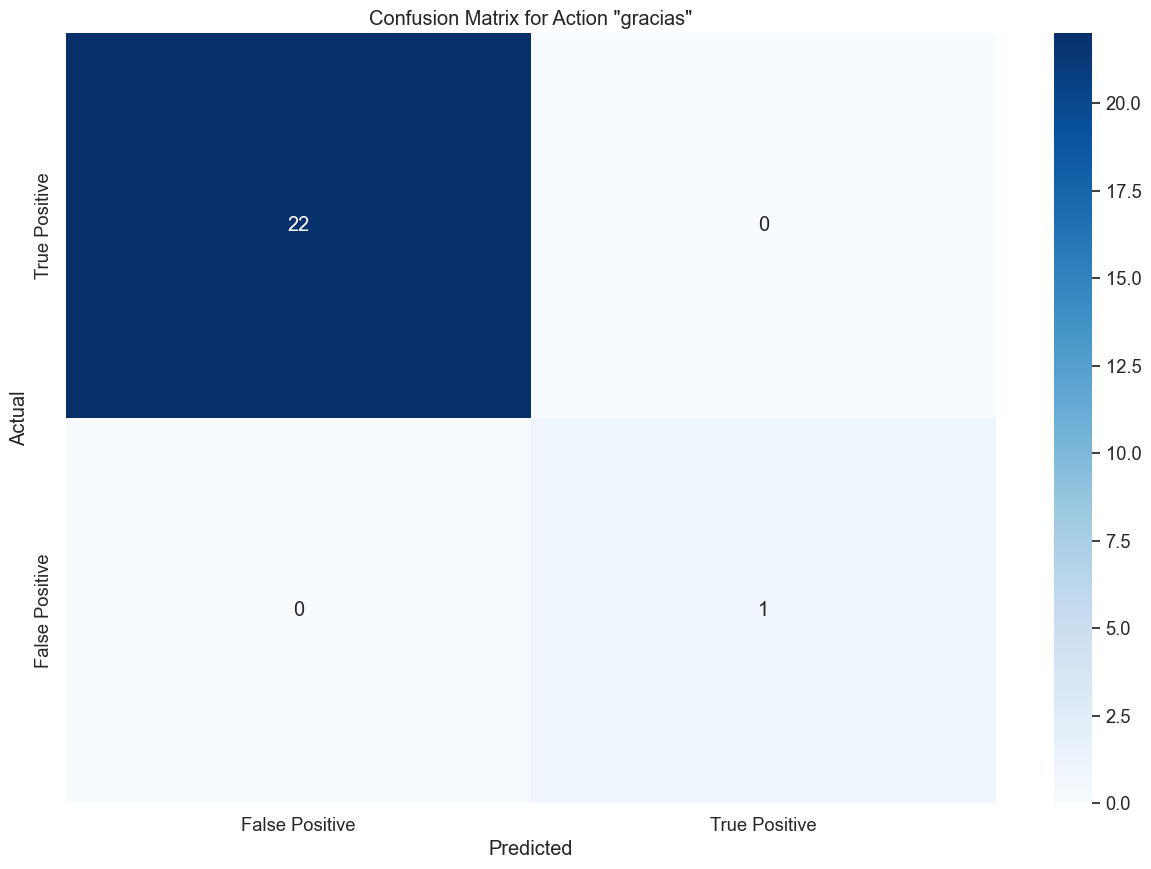

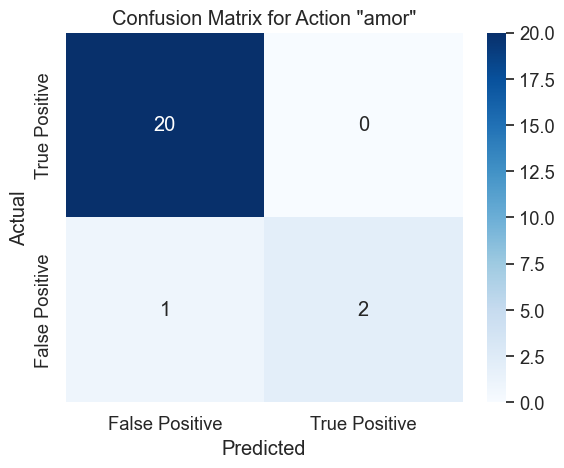

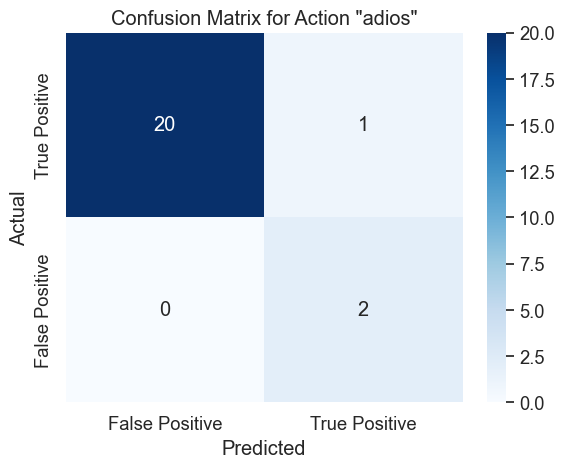

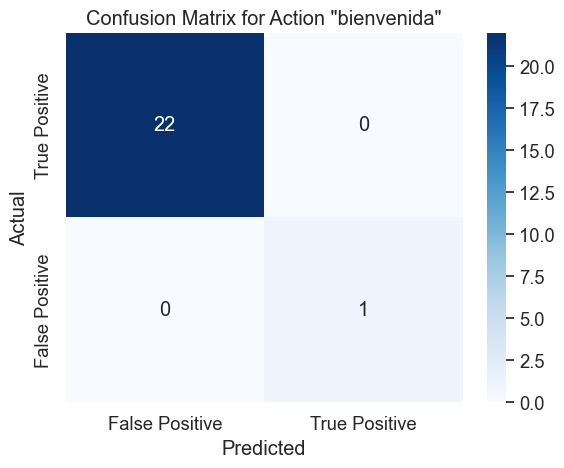

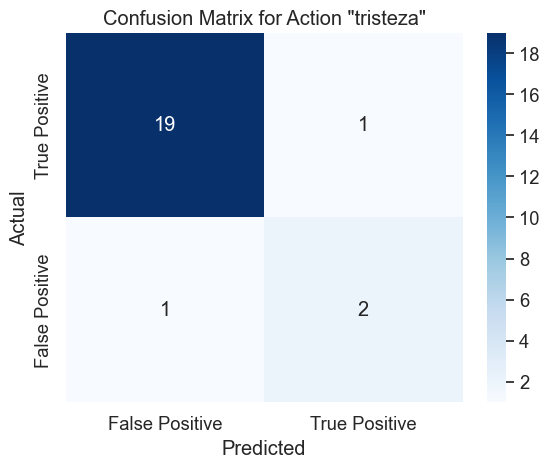

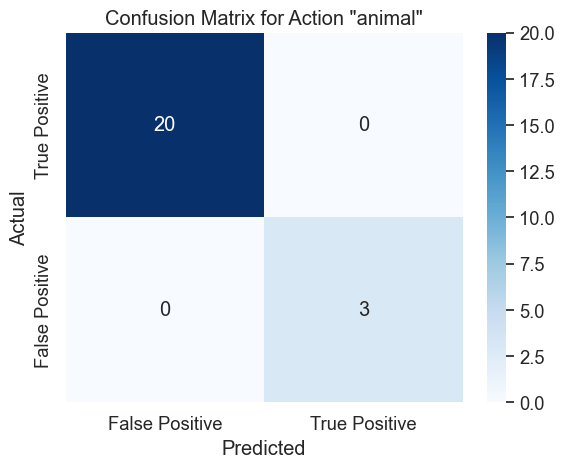

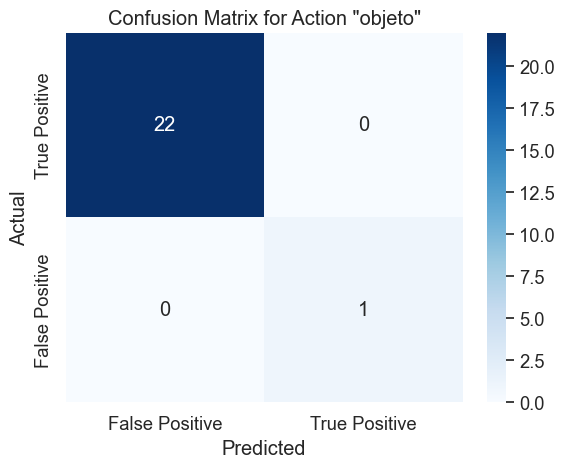

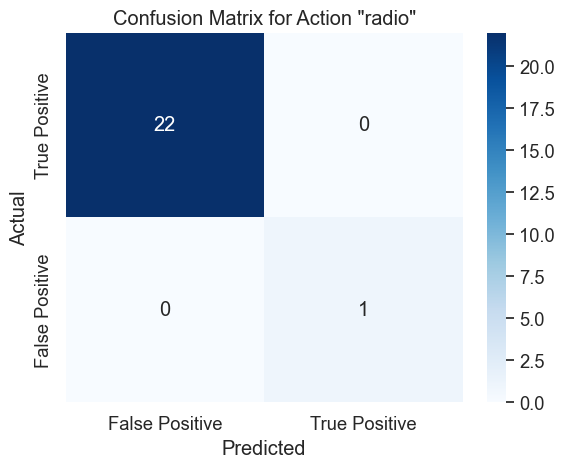

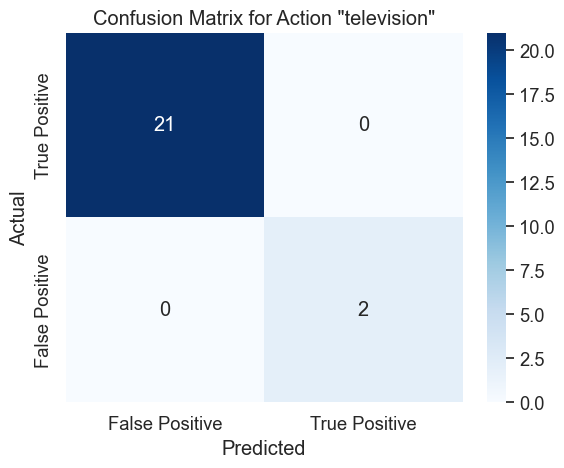

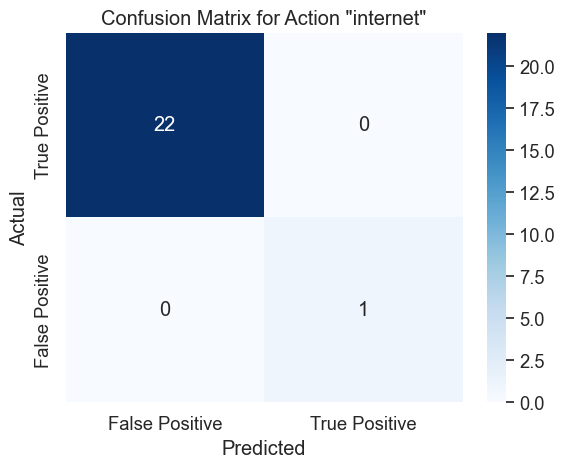

In [33]:
# Visualización usando Seaborn
plt.figure(figsize=(15, 10))
for i in range(len(confusion_matrix)):
    # Verificar si hay alguna predicción para esta acción
    if np.any(np.array([ytrue == i, ypred == i]).T):
        sns.heatmap(confusion_matrix[i], annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['False Positive', 'True Positive'],
                    yticklabels=['True Positive', 'False Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Action "{actions[i]}"')
        plt.show()

In [17]:
accuracy_score(ytrue, ypred)

0.9130434782608695